In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PropertyMol import PropertyMol
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
import pickle
import sys
from pathlib import Path
import pandas as pd

In [34]:
sys.path.append('/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/kinase_focused_fragment_library/analysis/ligand_analysis')
sys.path.append('/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/kinase_focused_fragment_library/recombination')
from construct_ligand import construct_ligand, read_fragment_library

In [35]:
def pickle_loader(pickle_file):

    try:
        while True:
            yield pickle.load(pickle_file)
    except EOFError:
        pass

In [36]:
combinatorial_library_folder = Path('/home/paula/Masterarbeit/CombinatorialLibrary_manuscript/')
file_name = combinatorial_library_folder / 'combinatorial_library.pickle'

In [37]:
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']
data = read_fragment_library(Path('/home/paula/Masterarbeit/FragmentLibrary'), subpockets)

Number of fragments in AP : 230
Number of fragments in FP : 254
Number of fragments in SE : 160
Number of fragments in GA : 100
Number of fragments in B1 : 23
Number of fragments in B2 : 34


In [38]:
# analyze subpocket arrangements
conn_count = {}
count = 0

with open(file_name, 'rb') as pickle_file:
    
    for ligand in pickle_loader(pickle_file):
        count += 1
        if count % 1000000 == 0:
            print(count)
        
        mol = Chem.RemoveHs(construct_ligand(ligand.meta, data))
        
        for atom in mol.GetAtoms():
            subpocket = atom.GetProp('subpocket')
            for neigh in atom.GetNeighbors():
                n_subpocket = neigh.GetProp('subpocket') 
                if n_subpocket != subpocket:
                    conn = frozenset((subpocket, n_subpocket))
                    if conn in conn_count:
                        conn_count[conn] += 1
                    else:
                        conn_count[conn] = 1

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000


StopIteration: 

In [42]:
conn_count

{frozenset({'FP', 'GA'}): 8485592,
 frozenset({'AP', 'GA'}): 24824520,
 frozenset({'AP', 'SE'}): 29287540,
 frozenset({'AP', 'FP'}): 23929424,
 frozenset({'B1', 'GA'}): 1525442,
 frozenset({'FP', 'SE'}): 2627864,
 frozenset({'B2', 'GA'}): 1645372,
 frozenset({'B1', 'B2'}): 2768}

In [40]:
connections = dict((k, v/sum(conn_count.values())) for k, v in conn_count.items())
connections

{frozenset({'FP', 'GA'}): 0.09190650750371591,
 frozenset({'AP', 'GA'}): 0.2688716277728349,
 frozenset({'AP', 'SE'}): 0.317210103287476,
 frozenset({'AP', 'FP'}): 0.2591769420937985,
 frozenset({'B1', 'GA'}): 0.016521893418807245,
 frozenset({'FP', 'SE'}): 0.028462104050577135,
 frozenset({'B2', 'GA'}): 0.017820841971238312,
 frozenset({'B1', 'B2'}): 2.9979901551981953e-05}

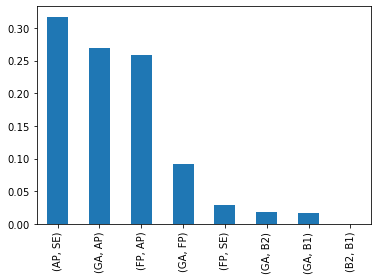

In [41]:
connections = pd.Series(data=connections).sort_values(ascending=False)
connections.plot.bar()